<a href="https://colab.research.google.com/github/Tatsuya28/IT41-project/blob/main/IT41_RSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IT41 project: RSA Cryptosystem 

Authors: 
+ Hakan Eraslan
+ Thomas Fridblatt
+ Jérémie Kimenau
+ Eliséo Vardanega

## Context

The RSA cryptography system was invented in 1977 by three mathematicians: Ronald Rivest, Adi Shamir and Leonard Adleman.  
RSA is an Asynchronous algorithm that we still use a lot in our current society because of its efficiency and its resistance against hacking (except quantum computing).
These three mathematicians wanted to demonstrate that asynchronous cryptography couldn’t work, and they ended up creating RSA, an algorithm based on that principle that is still largely used nowadays (we estimate that approximatively 300 million programs use the RSA algorithm).

<br/>

RSA is using the benefits of the modulus calculus and the difficulty to factorize large prime numbers to find the elements to easily decode the algorithm, which makes it safe to use even in important places. It is also relatively easy to understand and to use because it uses simple arithmetic calculus.
However, we can find some disadvantages, one of which are the large prime numbers to find (in principle more than 512 bits long by today's standards) for RSA to be secure.

<br/>

How does RSA work ?

```
1) Choose 2 very large prime numbers P and Q
2) Compute n = PQ
3) Compute φ(n) = (p - 1)(q - 1) (Euler's totient function)
4) Choose a prime number e such that e is coprime with φ(n)
5) Calculate d such that it satifies the congruence : d.e  ≡ 1 mod n
```
<br/>

In RSA, each recipient has 2 different keys used for secure communications:

*   A public key used by others to send him an encrypted message which consists of n and e
*   A private key made of P, Q and d for him to decrypt the messages he receives


<br/>


How do we use the private key and the public key ?

- Bob has respectively the following  public key and private key: ($e_{b}$, $n_{b}$) and ($d_{b}$)
- Alice has respectively the following  public key and private key ($e_{a}$, $n_{a}$) and ($d_{a}$)

<br/>


1.   Bob wants to send the message `Please, give me the answers of the Spring 2023 IT41 Midterm exam !` to Alice and wants it to be secret. Bob converts its message to its numerical equivalent and calls it `X`. Then he calculates the encrypted message `Y` by using the public key of Alice.

\begin{equation*}
Y = X^{e_{a}} \mod{n_{a}}
\end{equation*}

2. Alice receives the message from Bob. She uses her private key, that she and only she knows, then calculates the reverse operation made by Bob

\begin{equation*}
X = Y^{d_{a}} \mod{n_{a}}
\end{equation*}

<br/>

What if someone reads Y


... They will have a hard time finding X ! Why ?<br/>
RSA is based on the fact that finding $d_{a}$ using Y is a difficult task in math. It would require factoring  $n_{a}$ as the product of two prime numbers which is impossible when working with huge numbers. This is the `discrete logarithm problem.



## 1. **How to compute large prime numbers P and Q**

The first approach uses the definition of a prime number ``a whole number greater than 1 that cannot be exactly divided by any whole number other than itself and 1`` ( 2, 3, 5, 7, 11 etc...).

<br />

We can use the "Sieve of Eratosthenes", a Greek mathematician from 2nd century BC, to generate a list of prime numbers.  
In our case, we do not need a list, but simply two single prime numbers.

<br />


One could proceed like this to generate a random prime number:


*   Pick a random number n (bigger than 10^60)
*   Check every (odd) number from 3 to $\sqrt{n}$ and check if it divides n. 






In [ ]:
import random
import math


def is_prime(n):
    """Checks if n is a prime number"""
    if n == 2 or n == 3:
        return True
    if n < 2 or n % 2 == 0:
        return False
    for i in range(3, int(math.sqrt(n)) + 1, 2):
        if n % i == 0:
            return False
    return True

def generate_prime(n_digits):
    """Generates random numbers between 10^n_digits and 10^(n_digits+1) and returns it if it's prime"""
    while True:
        n = random.randint(10**n_digits, 10**(n_digits+1))
        if is_prime(n):
            return n


We can very easily check that `is_prime(n)` is linear with respect to `√n`, namely `T(is_prime(n)) ∈ O(√n)`. The `generate_prime()` function's complexity would be at best `O(√n)` if the first number picked is prime. The average and worst complexity is `O(s√n)` where `s` corresponds to the amount of numbers picked that were not prime.

</br>

Now, imagine that the computer can run `N` operations per second. Assuming $N = 10^{9}$, how fast could could it generate a prime number in the best-case scenario ?

</br>


\begin{align*}
\text{generate_prime} \in \mathcal{O}(\sqrt{n}) &\Leftrightarrow T(\text{generate_prime}(N)) \leq c\sqrt{N} \\
&\Leftrightarrow c = \frac{T(\text{generate_prime}(N))}{\sqrt{N}} \\
&T(\text{generate_prime}(n)) = \frac{T(\text{generate_prime}(N))}{\sqrt{N}} \times \sqrt{n} \\
&\Leftrightarrow T(\text{generate_prime}(n)) = \frac{1}{10^9} \times \sqrt{10^{60}} = 10^{21} \text{s} \approx 317{,}097{,}919{,}837{,}646 \text{ years}
\end{align*}

</br>

This results is equal to many times the age of the universe so this clearly is not a viable strategy to generate a prime number this big.  

</br>

This is where Pierre de Fermat who was a lawyer and also a French mathematician in the 17th century comes into play.

What we are interested in is `Fermat's little theorem` which states that for any given integer $a$, if $p$ is *pseudo-prime*, then the following statement is true:
$$a^{p-1} \equiv 1 \pmod{p}$$


</br>


This primality test can generate ``pseudo-prime`` numbers. A **pseudo-prime** is a probable prime (an integer that shares a property common to all prime numbers) that is not actually prime. For RSA however, we need actual prime numbers. For this example we are going to implement the Fermat Primality Test, but in reality life, it is important to use multiple tests (eg: Miller-Rabin / Lucas) to eliminate the pseudo-prime numbers.

</br>
  
In python, we can use the following code to do implement this approach :


In [ ]:
def power(a,n):
    res = 1
    for i in range(n):
        res = res*a
    return res

def generate_prime_little_Fermat(n_digits):
    a = 2
    while True:
        p = random.randint(10**n_digits, 10**(n_digits+1)) #Generate a random integer between min and max
        if (power(a,p-1)%p)==1: #We check that a^(p-1) is equal to 1 mod p
            return p

Technically, this is the required algorithm. However, if p is huge which means 10^n_digits is huge too, the computer cannot run the calculations as `a^(p-1)` would be excruciatingly long to compute.

</br>

Instead of using `power(a,p-1)%p` to check if $a^{p-1} \equiv 1 \mod{p}$, we can use what is called the "Right-to-left binary method" described by Bruce Schneier in 1993 in *Applied Cryptography*.  

The algorithm works as follows:

*   Convert the exponent to binary representation.
*   Start with the least significant bit of the binary representation.
*   If the current bit is 1, multiply the result by the base and take the result modulo the modulus.
*   Square the base and take the result modulo the modulus.
*   Move to the next bit in the binary representation.
*   Repeat steps 3-5 until all bits have been processed.

In [ ]:
def pow_mod(x, y, z):
    number = 1
    while y != 0:
        if y % 2 == 1: #Check the least significant bit of the binary representation.
            number = (number*x)%z
        y = y // 2 #Shift to the next bit by integer division.
        x = (x*x)%z
    return number

Let's prove the correctness of this algorithm:
</br>
</br>
</br>
</br>
</br>

-------------------------

What is the complexity of the algorithm ?

The while loop stops when y = 0. Each iteration, y is divided (using integer division) by 2 and because y is an integer, it will reach 0 at some point.
From this we conclude that the algorithm is logarithmic with resoect to the exponent y. `T(pow_mod) ∈ O(log(y))`

-------------------------

By using the fast modular exponentiation and the Little Fermat's Theorem, we can rewrite our final algorithm as:

In [ ]:
def generate_prime_little_Fermat_pow_mod(n_digits):
    a = 2
    while True:
        p = random.randint(10**n_digits, 10**(n_digits+1))
        if pow_mod(a, p-1, p) == 1:
            return p

Let's benchmark the function that uses the Little Fermat's Theorem to see how efficient it is:

Size of the generated prime 10^0: Naive generation time: 0.000024, Little Fermat time: 0.000009, with fast modular exponentiation: 0.000008
Size of the generated prime 10^1: Naive generation time: 0.000027, Little Fermat time: 0.000030, with fast modular exponentiation: 0.000028
Size of the generated prime 10^2: Naive generation time: 0.000015, Little Fermat time: 0.000159, with fast modular exponentiation: 0.000021
Size of the generated prime 10^3: Naive generation time: 0.000024, Little Fermat time: 0.014779, with fast modular exponentiation: 0.000068
Size of the generated prime 10^4: Naive generation time: 0.000037, Little Fermat time: 1.165726, with fast modular exponentiation: 0.000320
Size of the generated prime 10^5: Naive generation time: 0.000068, Little Fermat time: 1.165726, with fast modular exponentiation: 0.000057
Size of the generated prime 10^6: Naive generation time: 0.000191, Little Fermat time: 1.165726, with fast modular exponentiation: 0.000182
Size of the generate

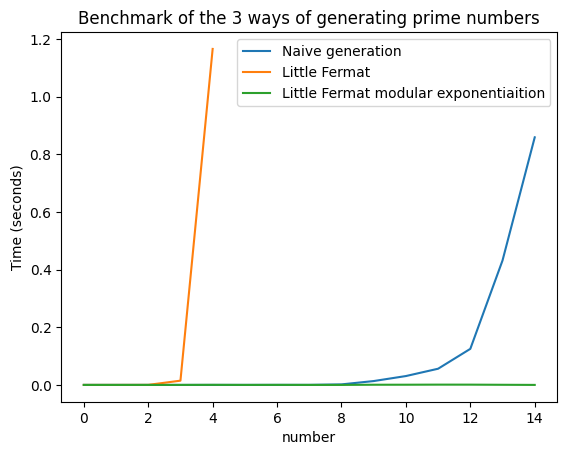

In [ ]:
import matplotlib.pyplot as plt
import time 

# Benchmark of the three functions to generate prime numbers
naive_generation = []
little_Fermat = []
little_Fermat_pow_mod = []
for number in range(0, 15):
    start_time = time.time()
    generate_prime(number)
    end_time = time.time()
    naive_time = end_time - start_time
    naive_generation.append(naive_time)

    if number < 5:
        start_time = time.time()
        generate_prime_little_Fermat(number)
        end_time = time.time()
        little_Fermat_time = end_time - start_time
        little_Fermat.append(little_Fermat_time)

    start_time = time.time()
    generate_prime_little_Fermat_pow_mod(number)
    end_time = time.time()
    little_Fermat_pow_mod_time = end_time - start_time
    little_Fermat_pow_mod.append(little_Fermat_pow_mod_time)
    print(f"Size of the generated prime 10^{number}: Naive generation time: {naive_time:.6f}, Little Fermat time: {little_Fermat_time:.6f}, with fast modular exponentiation: {little_Fermat_pow_mod_time:.6f}")

# Plot the execution times
plt.plot(range(0, 15), naive_generation, label="Naive generation")
plt.plot(range(0, 5), little_Fermat, label="Little Fermat")
plt.plot(range(0, 15), little_Fermat_pow_mod, label="Little Fermat modular exponentiaition")
plt.xlabel("number")
plt.ylabel("Time (seconds)")
plt.title("Benchmark of the 3 ways of generating prime numbers")
plt.legend()
plt.show()

Moreover, we need to take into consideration the way we generate the number p. This operation has a cost which is proportionnal to how big the number we want to generate is. Maybe there exist a more optimised way of picking a random number.


#2. Compute n = PQ

Nothing fancy here. We generate P, Q and do the product. A real child's play for the computer (the CPU has the multiplication operation embedded)

In [ ]:
p = generate_prime3(60)[0]
q = generate_prime3(60)[0]
n = p*q
print(n)

#3. Compute φ(n) = (p - 1)(q - 1) (Euler's totient function)

You are a professional now. You can easily guess what code is next.

In [ ]:
p = generate_prime3(60)[0]
q = generate_prime3(60)[0]
n = p*q
phi_n = (p-1)*(q-1)
print("  n  =", n)
print("φ(n) =", phi_n)

Now, the first part of the public key is generated. However, step 4 requires generating a prime number e which is coprime with ϕ(n).

#4. Choose a prime number e such that e is coprime with φ(n)

##Using the regular method

Two numbers a and b are coprimes if their Greatest Common Divisor GCD is one.
</br>
It can be obtained by applying the [Euclid's Algorithm](https://en.wikipedia.org/wiki/Euclidean_algorithm) made by the Greek mathematician Euclid who lived 300BC. It can be implemented as follows:

In [ ]:
def gcd(a, b):
    while b != 0:
        t = b
        b = a % b
        a = t
    return a

a = 333
b = 3
print("The gcd of", a, "and", b, "is", gcd(a,b))

At a given step, If `b > a`, then `b = a` because in this case `a mod(b) = a`

The complexity of this algorithm is determined by the operation `b = a % b`.
</br>
Each iteration the size of b is reduced. So we know that the complexity would be logarithmic. We can deduce that the complexity depends on the parameters a and b. Assuming a > b, the worst-case scenario occurs when a and b are consecutive Fibonacci numbers, giving the number of iterations to be log(b). If b > a, then the modulus operation just inverts a and b. Thus `T(gcd(a,b)) ∈ O(log(min(a,b))`

That means that we are searching for a random value that have a pgcd of 1 with φ. To  find such a value, we can do the naive version that will provide us a value, if it exists that checks what we want: 

In [ ]:
def find_e(phi_n,first_e):
    e=first_e
    while(pow(e,2)<phi_n):
        if(gcd(e, phi_n)==1): 
            return e        
        else:
            e=e+1
    return -1  

phi_n=2941118472449507032646109278075334883244063122124271924290109236219743252939363726450480160657162915398332737546285631340
first_e=4
print("the value of e can be:",find_e(phi_n,first_e))


If we want to measure the complexity of find_e, we need to keep in mind that it contains the function `gcd(a,b)` which has a `log(min(a,b))` complexity.

Here we are doing this iteration in the worst case (if we take the smallest first_e possible and we can't find an e ) `phi_n - first_e` times. We can tell that we are doing this aproximatively phi_n times.</br>
So we have `T(find_e(phi_n,first_e))=n*log(n)+n ∈ O(phi_n*log(min(e, phi_n)))`

</br>

However, it is worth saying that here we look for the smallest e value, but e should be a bit bigger for more security.

</br>



##The magic exponent e = 65537

Any web browser allows the user to view the https certificat used for secure connexions a to a website. By checking RSA, it is possible to get a 2048 bits long number n and a public exponent e.</br>
Interestingly the public exponent e is almost always the same, the hexadecimal number `010001 = 65537` !

</br>

What are the properties of this number ?:

```
1.   It is a prime number
2.   It is a Fermat Number, a number that can be written like 2^(2n)+1
3.   It is the biggest number that verifies both properties

```

Because it is prime, it can be used in RSA. Moreover, it is a relatively big exponent, making it more difficult to bruteforce to find the private exponent.
And... Its binary representation is `10000000000000001` which makes calculations fact and easy using the `Right-to-left binary` method.

</br>

This means that a website could use 65537 as a choice for e and it will work almost every time.





#5.Calculate d such that it satifies the congruence : d.e  ≡ 1 mod n

Now that we have n and e, the two elements of the public key, we need to find d, the private coefficient such that d.e ≡ mod n

In [ ]:
def extended_euclid_algorithm(e, phi_n):
    r, r_prev = e, phi_n
    v, v_prev = 0, 1

    while r_prev != 0:
        quotient = r // r_prev
        r, r_prev = r_prev, r - quotient * r_prev
        v, v_prev = v_prev, v - quotient * v_prev

    return v % e if r == 1 else None

e=7
phi_n=789

#print("the value of d for e=",e,", phi_n=",phi_n,"is equal to :",extended_euclid_algorithm(e,phi_n))
print(f"the value of d for e= {e}, phi_n={phi_n} is equal to : {extended_euclid_algorithm(e, phi_n)}")

We can search the complexity of that algorithm:

The calculation of the complexity is practicly the same as the  one seen in the GCD part. We are just doing 2 times the number of operations because we do it in one way and in the other way.

That means that the θnotation will be the same: `T(extended_euclid_algorithm(e,phi_e)) ∈ O(log(min(e,phi_e)) `